# Comparative Study of Neural Network, and CNN using the CIFAR-10 Dataset in Keras.



## Goal

In this homework, you will learn about the experiences of training Neural Networks using the Keras framework. Keras is a deep learning API written in Python, capable of running on top of JAX, TensorFlow, or PyTorch. It's very simple and straightforward. For further information, you can refer to the [official documentation](https://keras.io/). Additionally, here are four basic tutorial resources for learning how to use Keras.

- https://www.analyticsvidhya.com/blog/2021/06/mnist-dataset-prediction-using-keras/
- https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
- https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
- https://keras.io/examples/vision/mnist_convnet/


## Instruction

- Submit your assignments onto **Canvas** by the due date.
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged.
- Most coding parts can be finished with about 1-6 lines of codes.



## Rubric

The assignment is worth 65 points in total:

### Part 1: Neural Network ( 50 points)

- Step 1: Design, compile, train, and evaluate a simple neural network (10 points)

- Step 2: Experiment with different activation functions and evaluate their influence on model performance (10 points)

- Step 3: Adjust and experiment with the number of parameters (10 points)

- Step 4: Experiment with the depth and width of your neural network (10 points)

- Step 5: Build an optimized neural network based on observations from previous tasks and analyze the performance (10 points).

### Part 2: Convolutional neural network  ( 15 points)

Use CNN to replace the vanilla neural network from Part 1 and report your findings.


In [2]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Visualize data

In [3]:
# Load CIFAR Dataset from Keras
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to binary class matrices
num_classes = 10
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Split the full training dataset into validation dataset in 80-20 ratio
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)


x_train.shape, x_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

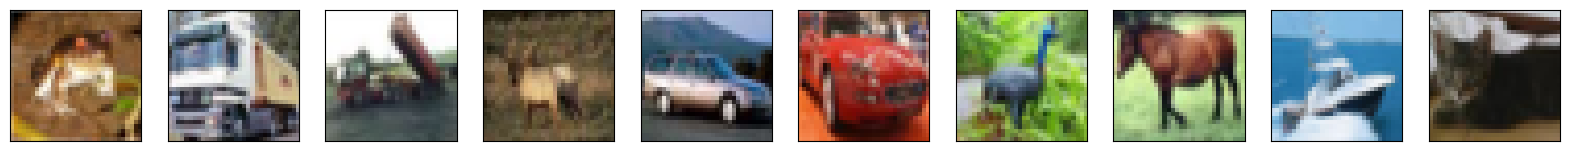

In [4]:
# Plotting function
def plot_images(X, y, number_of_images=10):
    plt.figure(figsize=(20, 5))
    for i in range(number_of_images):
        plt.subplot(1, number_of_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
    plt.show()

# Call the function
plot_images(x_train_full, y_train_full)

## Part 1: Neural Network
### Step 1: Build a simple neural network
First, build a simple neural network for the CIFAR-10 dataset. You will need to:

Load the CIFAR-10 dataset from Keras. Normalize the data and transform the labels to a categorical format.
Define that simple neural network. This network should have at least **three** hidden layer using 'relu' activation and a softmax output layer for the 10 classes of the CIFAR-10 dataset.
Compile the model. Use 'categorical_crossentropy' for your loss function and 'adam' as the optimizer. The metrics will be 'accuracy'.
Train the model. Use a validation split of 0.2. Train for 10 epochs.
Evaluate the model on the test set and report its accuracy.

### Step 2: Change the activation
Next, experiment with different activation functions. Repeat the Step 1 process three times-- once with 'relu' replaced with 'sigmoid', once with 'tanh', and finally with 'gelu'. For each, evaluate the model's performance and document any changes you observe.

### Step 3: Change the number of parameters
Now, significantly **increase** and **decrease** the number of parameters in your neural network (by an order of magnitude) and compare results. Observe and document how the number of network parameters influences the model's performance.

### Step 4: Change the depth and width
Now, experiment with the structure of your neural network, specifically its depth and width, and compare results while trying to keep the number of parameters fixed.

***Increasing the depth***: Add more layers to your network. Try to make your model deeper by adding more layers of neurons. Keep note of how this affects training and performance.

***Increasing the width***: Make your model wider by increasing the number of neurons in the hidden layers. Observe and document how this influences the model's performance.

Remember that you are trying to keep the total number of parameters roughly equivalent for each alteration. This means that if you add more layers (increasing depth), you may need to reduce the number of neurons in each layer (decreasing width) to compensate, and vice versa. The aim is to explore the trade-off between network depth and width.

Make sure to evaluate each alteration and compare it to the performance of your original network.

### Step 5: Building an Optimized Neural Network
Guided by your observations and findings from previous steps, it's now time to build an optimized neural network. Here are the tasks for this step:

Design the Network: Based on your previous experiments, devise a network architecture that you believe will yield the best performance. Consider the number of layers, the number of neurons in each layer, and the activation functions.

Compile the Model: Compile your model with the 'adam' optimizer and 'categorical_crossentropy' as the loss function. Use 'accuracy' as the evaluation metric as used previously.

Train the Model: Train this model using the same parameters as the previous step (validation split of 0.2, 10 epochs). Remember to use the training data for training the model.

Evaluate the Model: Evaluate your model on the test set and report the performance metrics.

Analyze: Analyze if the designed model’s performance has improved as intended. Outline any strategies you used to improve the performance, and discuss the results.

# Step 1:


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras


# First, build a simple neural network for the CIFAR-10 dataset. You will need to:
# Load the CIFAR-10 dataset from Keras. Normalize the data and transform the labels to a categorical format. Define that simple neural network.
# This network should have at least three hidden layer using 'relu' activation and a softmax output layer for the 10 classes of the CIFAR-10 dataset.
# Compile the model. Use 'categorical_crossentropy' for your loss function and 'adam' as the optimizer. The metrics will be 'accuracy'. Train the model.
# Use a validation split of 0.2. Train for 10 epochs. Evaluate the model on the test set and report its accuracy.

# Load Data
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10
# ========== YOUR CODE STARTS HERE ==========
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2, random_state = 42)
# ========== YOUR CODE ENDS HERE ==========


# Define Network
# ========== YOUR CODE STARTS HERE ==========
model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

# ========== YOUR CODE ENDS HERE ==========




# Compile Model
# ========== YOUR CODE ENDS HERE ==========
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# ========== YOUR CODE ENDS HERE ==========

# summary
model.summary()


# Train Model
# ========== YOUR CODE ENDS HERE ==========
model.fit(x_train, y_train, epochs=10, validation_data = (x_val, y_val))
# ========== YOUR CODE ENDS HERE ==========

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/12

# Step 2:

## Your findings:

The models with gelu and relu activation yielded the highest test accuracys at around 48%.

The model with sigmoid activation had a test accuracy of 39% while the model with a tanh activation only had 30% accuracy.


In [5]:
# Next, experiment with different activation functions. Repeat the Step 1 process three times-- once with 'relu' replaced with 'sigmoid',
# once with 'tanh', and finally with 'gelu'. For each, evaluate the model's performance and document any changes you observe.

# Change activation function (sigmoid)
model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='sigmoid'),
        Dense(256, activation='sigmoid'),
        Dense(128, activation='sigmoid'),
        Dense(num_classes, activation='softmax')
    ])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/

In [6]:
# Change activation function (tanh)
model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='tanh'),
        Dense(256, activation='tanh'),
        Dense(128, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0687 - accuracy: 0.2166 - val_loss: 2.0288 - val_accuracy: 0.2185
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9958 - accuracy: 0.2526 - val_loss: 1.9419 - val_accuracy: 0.2708
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9695 - accuracy: 0.2697 - val_loss: 1.9401 - val_accuracy: 0.2872
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9498 - accuracy: 0.2829 - val_loss: 1.9237 - val_accuracy: 0.2924
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9408 - accuracy: 0.2863 - val_loss: 1.9382 - val_accuracy: 0.2856
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9247 - accuracy: 0.2954 - val_loss: 1.9063 - val_accuracy: 0.3074
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9073 - accuracy: 0.3000 - val_loss: 1.9217 - val_accuracy:

In [7]:
# Change activation function (gelu)
model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='gelu'),
        Dense(256, activation='gelu'),
        Dense(128, activation='gelu'),
        Dense(num_classes, activation='softmax')
    ])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1573376   
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/

 # Step 3:

 ## Your findings:
 In step 3, I modified the number of parameters in each layer using the relu activation function, a softmax layer, the adam optimizer, and categorial_crossentorpy loss.

 From the results, it can be observed the the number of parameters do not change the accuracy of the model in this specific case. 
 
 The first model with an initial hidden layer of 1024 actually performed worse than the model that only contained 256 neurons as their first layer.

In [4]:
# increase number of parameters in the network
model = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 3805450 (14.52 MB)
Trainable params: 3805450 (14.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/

In [5]:
# Reduce number of parameters in the network

model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               786688    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 828490 (3.16 MB)
Trainable params: 828490 (3.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.9156 - accuracy: 0.3044 - val_loss: 1.7877 - val_accuracy: 0.3545
Epoch 2/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.7257 - accuracy: 0.3789 - val_loss: 1.6638 - val_accuracy: 0.3995
Epoch 3/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.6396 - accuracy: 0.4152 - val_loss: 1.6612 - val_accuracy: 0.3979
Epoch 4/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.5867 - accuracy: 0.4323 - val_loss: 1.5610 - val_accuracy: 0.4416
Epoch 5/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.5481 - accuracy: 0.4466 - val_loss: 1.5727 - val_accuracy: 0.4316
Epoch 6/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.5157 - accuracy: 0.4615 - val_loss: 1.5361 - val_accuracy: 0.4497
Epoch 7/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4900 - accuracy: 0.4672 - val_loss: 1.5273 - val_accuracy:

# Step 4:

 ## Your findings and report the number of parameters as well (should be the same):

 In this step, I have one model with a wide layer of 512 neurons (1.57 million parameters) in a single hidden layer while the other model contains eight hidden layers of 303 neurons (1.57 million parameters).

 It can be observed from the test accuracy that the accuracy does not differ too much. There is roughly a one percent difference in accuracy between the two models. 

 Therefore, it can be concluded that changing the shape of the network does not impact the accuracy of the model significantly.

In [5]:
# Increase width, decrease depth

model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9177 - accuracy: 0.3196 - val_loss: 1.7642 - val_accuracy: 0.3721
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7195 - accuracy: 0.3848 - val_loss: 1.6641 - val_accuracy: 0

In [7]:
# Increase depth, decrease width

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(351, activation='relu'),  
    Dense(351, activation='relu'),  
    Dense(351, activation='relu'),  
    Dense(351, activation='relu'),  
    Dense(351, activation='relu'),  
    Dense(num_classes, activation='softmax')
])


# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 351)               1078623   
                                                                 
 dense_12 (Dense)            (None, 351)               123552    
                                                                 
 dense_13 (Dense)            (None, 351)               123552    
                                                                 
 dense_14 (Dense)            (None, 351)               123552    
                                                                 
 dense_15 (Dense)            (None, 351)               123552    
                                                                 
 dense_16 (Dense)            (None, 10)               

# Step 5: Building an Optimized Neural Network


## Discsuss:
In this step, I attempted to put together the best traits of the models above. 

My model consists of five hidden layers with the gelu activation because that activation function yielded the highest accuracy earlier.

Also, from what I observed in the previous step, it is beneficial to have multiple layers to process, hence the five hidden layers of 512 neurons each.

I noticed that the model was doing better than the other ones during training, but had a mediocre performance on the test model. 

I believe that this is due to the high number of parameters in the model which may have led to overfitting.

In [9]:
# Your network here

model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='gelu'),
        Dense(512, activation='gelu'),
        Dense(512, activation='gelu'),
        Dense(512, activation='gelu'),
        Dense(512, activation='gelu'),
        Dense(num_classes, activation='softmax')
    ])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 dense_25 (Dense)            (None, 10)               

# Part 2 CNN

Utilizing the Keras Sequential model, define a Convolutional Neural Network (CNN) model that is adapted to classify images in the CIFAR-10 dataset. Add the necessary layers to the model.

For example: * Convolutional layer * Pooling layer * Dropout layer * Flatten layer * Fully connected layer. Of course, you can use whatever you want.

Make sure to select appropriate activation functions for the layers. Share your findings about CNN for image classification compared to the neural network of Part 1.


## Your findings:
In this step, I build a model from the suggested example above. The layers of this model include three convolutional layers, 2 pooling layers, and one fully connected layer at the end with a dropout of 0.5.

This convolutional neural network yields a significantly higher training and test accuracy than all the other neural network models.

I chose to use less parameters in the layers to prevent overfitting. It was also noticed earlier that having less parameters does not necessarily negatively affect the model.

Therefore, it can be observed from the results that the CNN classifies images much more accurately than a regular CNN.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.datasets import cifar10

# # Load Data
# (x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
# x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Model definition
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=x_train_full.shape[1:]),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])


# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             